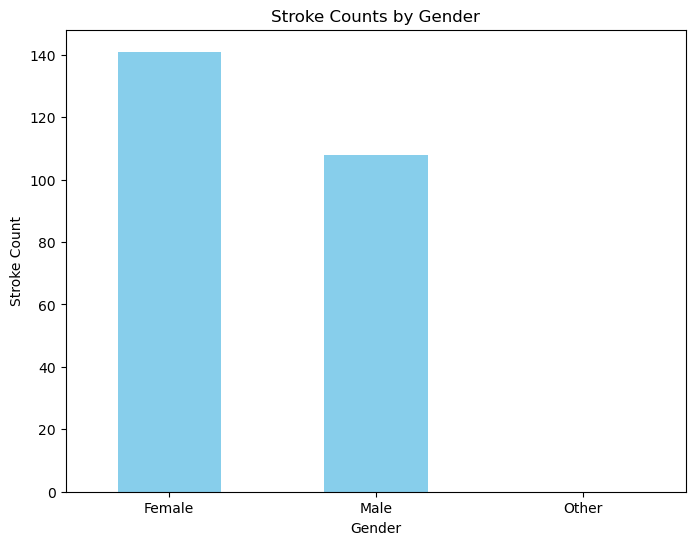

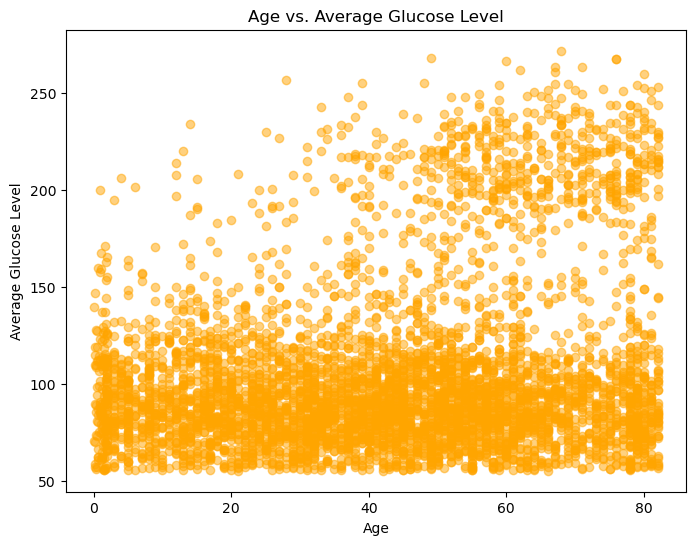

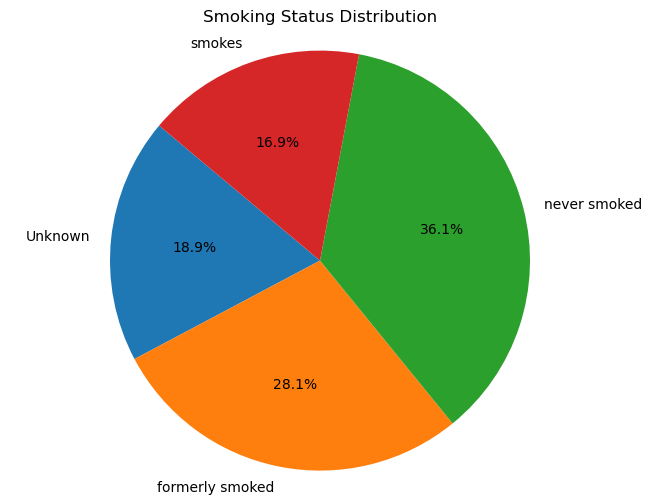

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

IntSlider(value=0, description='Age:', max=120)

Checkbox(value=False, description='Hypertension')

Checkbox(value=False, description='Heart Disease')

Dropdown(description='Ever Married:', options=('Yes', 'No'), value='Yes')

Dropdown(description='Work Type:', options=('Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'…

Dropdown(description='Residence Type:', options=('Urban', 'Rural'), value='Urban')

FloatSlider(value=0.0, description='Avg Glucose Level:', max=300.0)

FloatSlider(value=0.0, description='BMI:')

Dropdown(description='Smoking Status:', options=('Unknown', 'never smoked', 'formerly smoked', 'smokes'), valu…

Button(description='Predict', style=ButtonStyle())

Accuracy of the Logistic Regression Model: 72.9941% 

	Person #1's details:
		Gender: Male
		Age: 44
		Hypertension: False
		Heart Disease: False
		Ever Married: Yes
		Work Type: Private
		Residence Type: Urban
		Avg Glucose Level: 142.7
		BMI: 53.2
		Smoking Status: never smoked

	Prediction: False, this individual is unlikely to suffer from a stroke. 

	Person #2's details:
		Gender: Female
		Age: 96
		Hypertension: True
		Heart Disease: True
		Ever Married: Yes
		Work Type: Private
		Residence Type: Urban
		Avg Glucose Level: 179.0
		BMI: 33.1
		Smoking Status: never smoked

	Prediction: True, this individual is likely to suffer from a stroke. 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection
from sklearn.impute import SimpleImputer
import ipywidgets as widgets
from IPython.display import display

# Colors
RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
BLUE = "\033[94m"
PURPLE = "\033[95m"
CYAN = "\033[96m"
PINK = "\033[1;95m"
ORANGE = "\033[38;5;208m"
RESET = "\033[0m"

# Colors text for print statements
def set_style(text, color):
    return f"{color}{text}{RESET}"

# Load the dataset
url = "https://raw.githubusercontent.com/drewmarsh/stroke-dataset/main/stroke-dataset.csv"
df = pd.read_csv(url)

# Bar Chart for Stroke Counts by Gender
stroke_counts = df.groupby('gender')['stroke'].sum()
plt.figure(figsize=(8, 6))
stroke_counts.plot(kind='bar', color='skyblue')
plt.title('Stroke Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Stroke Count')
plt.xticks(rotation=0)
plt.show()

# Scatter Plot for Age vs. Average Glucose Level
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['avg_glucose_level'], alpha=0.5, c='orange')
plt.title('Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

# Pie Chart for Stroke Distribution by Smoking Status
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].sum()
plt.figure(figsize=(8, 6))
plt.pie(stroke_by_smoking_status, labels=stroke_by_smoking_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Smoking Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Preprocessing by means of one hot encoding categorical features
X = pd.get_dummies(df.iloc[:, 1:11])  # Assuming columns 'gender' through 'smoking_status' as features
y = df['stroke']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_imputed, y, test_size=0.3)

# Initialize and train the Logistic Regression model with class weights
mylog_model = linear_model.LogisticRegression(max_iter=1000, class_weight='balanced')
mylog_model.fit(X_train, y_train)

# Define input widgets for each feature
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
age_widget = widgets.IntSlider(min=0, max=120, description='Age:')
hypertension_widget = widgets.Checkbox(description='Hypertension')
heart_disease_widget = widgets.Checkbox(description='Heart Disease')
ever_married_widget = widgets.Dropdown(options=['Yes', 'No'], description='Ever Married:')
work_type_widget = widgets.Dropdown(options=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], description='Work Type:')
residence_type_widget = widgets.Dropdown(options=['Urban', 'Rural'], description='Residence Type:')
avg_glucose_level_widget = widgets.FloatSlider(min=0, max=300, description='Avg Glucose Level:')
bmi_widget = widgets.FloatSlider(min=0, max=100, description='BMI:')
smoking_status_widget = widgets.Dropdown(options=['Unknown', 'never smoked', 'formerly smoked', 'smokes'], description='Smoking Status:')

# Running total of tests
tests_running_total = 0

# Define a function to make predictions based on input values
def make_predictions(gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status):
    # Add 1 to running total of tests and display it
    global tests_running_total
    tests_running_total += 1
    print("\tPerson #{}'s details:".format(set_style(tests_running_total, YELLOW)))
    
    # Display input values with color formatting
    attributes = {
        'Gender': gender,
        'Age': age,
        'Hypertension': hypertension,
        'Heart Disease': heart_disease,
        'Ever Married': ever_married,
        'Work Type': work_type,
        'Residence Type': residence_type,
        'Avg Glucose Level': avg_glucose_level,
        'BMI': bmi,
        'Smoking Status': smoking_status
    }
    
    for attribute, value in attributes.items():
        print(f"\t\t{attribute}:", set_style(str(value), YELLOW))
    print()
    
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [ever_married],
        'work_type': [work_type],
        'residence_type': [residence_type],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status]
    })
    
    # Ensure the input data has the same set of columns as the training data
    input_data = pd.get_dummies(input_data).reindex(columns=X.columns, fill_value=0)
    
    # Preprocess input data (imputation)
    input_data_imputed = pd.DataFrame(imputer.transform(input_data), columns=input_data.columns)
    
    # Make prediction
    log_prediction = mylog_model.predict(input_data_imputed)[0] == 1
    
    # Display prediction with color
    if log_prediction:
        print("\tPrediction:", set_style("True, this individual is likely to suffer from a stroke.", GREEN), "\n")
    else:
        print("\tPrediction:", set_style("False, this individual is unlikely to suffer from a stroke.", RED), "\n")

# Create a button to trigger predictions
predict_button = widgets.Button(description="Predict")

# Define an event handler for the button click
def on_predict_button_clicked(b):
    # Get the current values of the input widgets
    gender = gender_widget.value
    age = age_widget.value
    hypertension = hypertension_widget.value
    heart_disease = heart_disease_widget.value
    ever_married = ever_married_widget.value
    work_type = work_type_widget.value
    residence_type = residence_type_widget.value
    avg_glucose_level = avg_glucose_level_widget.value
    bmi = bmi_widget.value
    smoking_status = smoking_status_widget.value
    
    # Make predictions based on the input values
    make_predictions(gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status)

# Display the input widgets and button
display(gender_widget, age_widget, hypertension_widget, heart_disease_widget, ever_married_widget, work_type_widget, residence_type_widget,
        avg_glucose_level_widget, bmi_widget, smoking_status_widget, predict_button)

# Register the event handler with the button
predict_button.on_click(on_predict_button_clicked)

# Evaluate and display accuracy of the logistic regression model
accuracy = mylog_model.score(X_test, y_test)
accuracy_percent = accuracy * 100
print("Accuracy of the Logistic Regression Model:", set_style("{:.4f}%".format(accuracy_percent), PINK), "\n")
